In [3]:
import os
import pickle
import glob
import skimage
import skimage.transform
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import csv

import sys

%matplotlib inline

In [53]:
freqs = []
amp0 = []
phase0 = []

amp1 = []
phase1 = []



with open('../../data/phase/data/2.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')

    headerNum = 5
    for i in range(headerNum):
        next(reader)
        
    for row in reader:
        freqs.append(float(row[0]))
        amp0.append(float(row[1]))
        phase0.append(float(row[2]))
        
with open('../../data/phase/data/4.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')

    headerNum = 5
    for i in range(headerNum):
        next(reader)
        
    for row in reader:
        amp1.append(float(row[1]))
        phase1.append(float(row[2]))
        

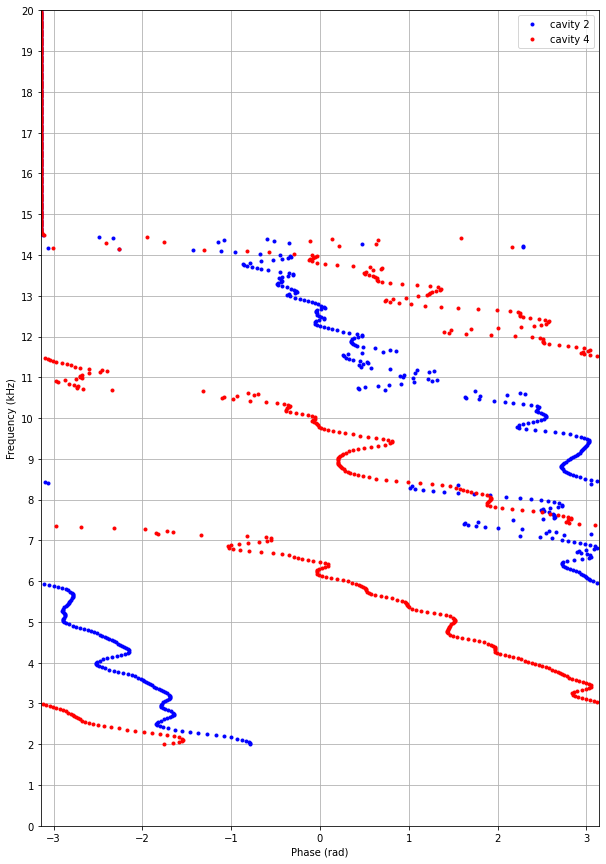

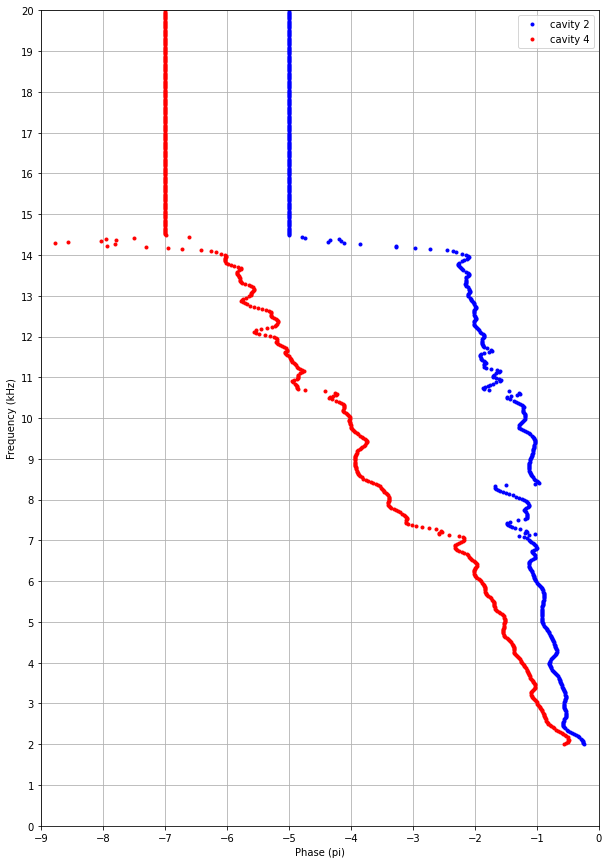

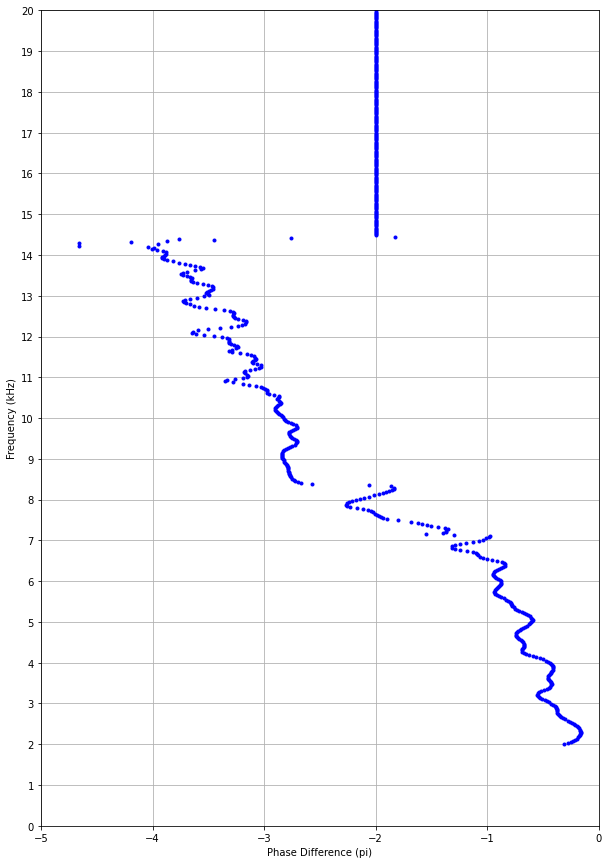

In [60]:
plt.figure(figsize=(10, 15))
plt.yticks(np.linspace(0, 20, 21))
#plt.plot(np.array(phase1) - np.array(phase0), freqs0, 'g.')
plt.xlabel('Phase (rad)')
plt.ylabel('Frequency (kHz)')
plt.axis([-np.pi, np.pi, 0, 20])
plt.plot(phase0, freqs, 'b.')
plt.plot(phase1, freqs, 'r.')
plt.grid()
plt.legend(['cavity 2', 'cavity 4'])
plt.savefig('../../data/phase/figures/2_4_phase_raw.png')

unwrap0 = np.unwrap(phase0)
unwrap1 = np.unwrap(phase1)

plt.figure(figsize=(10, 15))
plt.yticks(np.linspace(0, 20, 21))
plt.xticks(np.linspace(-9, 0, 10) )
#plt.plot(np.array(phase1) - np.array(phase0), freqs0, 'g.')
plt.xlabel('Phase (pi)')
plt.ylabel('Frequency (kHz)')
plt.axis([-9, 0, 0, 20])
plt.plot(unwrap0/np.pi, freqs, 'b.')
plt.plot(unwrap1/np.pi, freqs, 'r.')
plt.grid()
plt.legend(['cavity 2', 'cavity 4'])
plt.savefig('../../data/phase/figures/2_4_phase_unwrap.png')

unwrap0 = np.array(unwrap0)
unwrap1 = np.array(unwrap1)
phaseDiff = unwrap1 - unwrap0


plt.figure(figsize=(10, 15))
plt.yticks(np.linspace(0, 20, 21))
plt.xticks(np.linspace(-100, 100, 201))
#plt.plot(np.array(phase1) - np.array(phase0), freqs0, 'g.')
plt.xlabel('Phase Difference (pi)')
plt.ylabel('Frequency (kHz)')
plt.axis([-5, 0, 0, 20])
plt.plot(phaseDiff/np.pi, freqs, 'b.')

plt.grid()
plt.savefig('../../data/phase/figures/2_4_phaseDiff.png')


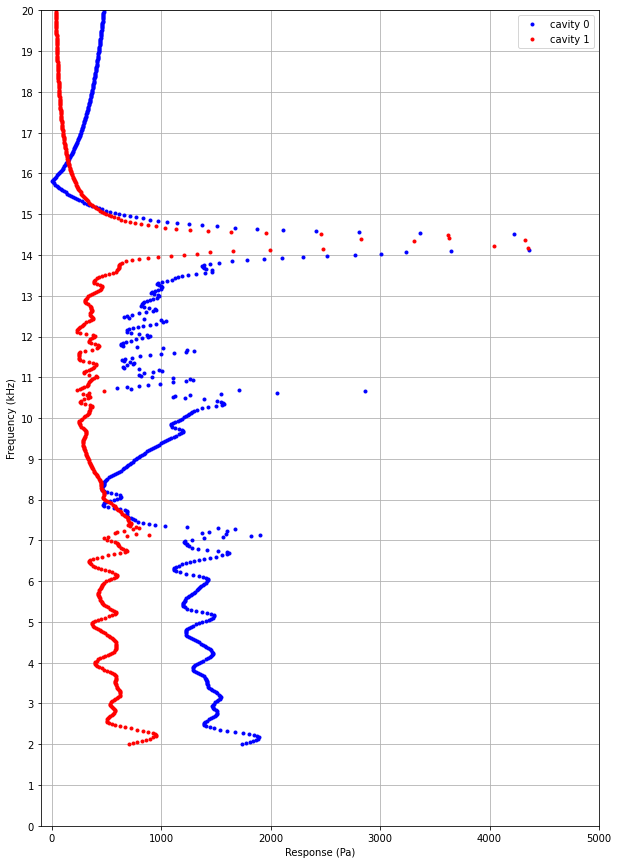

In [151]:
plt.figure(figsize=(10, 15))
plt.yticks(np.linspace(0, 20, 21))
plt.plot(amp0, freqs, 'b.')
plt.plot(amp1, freqs, 'r.')
plt.xlabel('Response (Pa)')
plt.ylabel('Frequency (kHz)')
plt.legend(['cavity 0', 'cavity 1'])
plt.axis([-100, 5000, 0, 20])
plt.grid()
plt.savefig('../../data/phase/figures/0_1_amp.png')

unwrap0 = []
for i in range(len(phase0)):
    unwrap0.append(phase0[i])
    
for i in range(1, len(phase0)):
    if phase0[i] - phase0[i-1] >= 5.2:
        for j in range(i, len(phase0)):
            unwrap0[j] -= 2*np.pi

unwrap1 = []
for i in range(len(phase1)):
    unwrap1.append(phase1[i])
    
for i in range(1, len(phase1)):
    if phase1[i] - phase1[i-1] >= 5.2:
        for j in range(i, len(phase1)):
            unwrap1[j] -= 2*np.pi

unwrap0 = np.array(unwrap0)
unwrap1 = np.array(unwrap1)


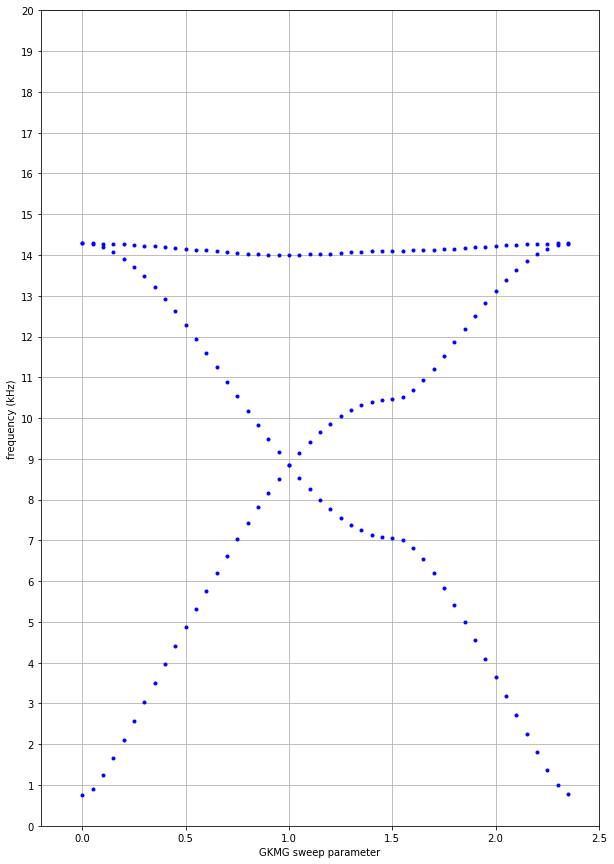

In [119]:
b_sim = []
band1 = []
band2 = []
band3 = []

freqs = np.linspace(2, 16, 500)
with open('../../data/simulation/kagome_PLAcover_clean-all bands.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    
    for row in reader:
        b_sim.append(float(row[0]))
        band1.append(float(row[1])/1000)
        band2.append(float(row[2])/1000)
        band3.append(float(row[3])/1000)
        
plt.figure(figsize=(10, 15))
plt.plot(b_sim, band1, 'b.')
plt.plot(b_sim, band2, 'b.')
plt.plot(b_sim, band3, 'b.')
plt.axis([-0.2, 2.5, 0, 20])
plt.yticks(np.linspace(0, 20, 21))
plt.xlabel('GKMG sweep parameter')
plt.ylabel('frequency (kHz)')
plt.grid()
plt.savefig('../../data/phase/figures/band_structure.png')